# Retail Customer Churn Model

## Data Overview
Data File: ecommerce_customer_data.csv

This dataset contains 15,000 customer records with 14 features and the churn target variable.

Contains columns:
- account_age_months: Number of months since customer account creation (numeric)
- avg_orders_per_month: Average number of orders placed monthly (numeric)
- avg_order_value: Average dollar amount spent per order (numeric)
- returns_rate: Proportion of items returned from total orders (numeric, 0-1)
- support_tickets_6m: Number of customer support tickets in last 6 months (integer)
- reviews_submitted: Total number of product reviews submitted (integer)
- website_visits_per_month: Average website visits per month (integer)
- cart_abandonment_rate: Proportion of shopping carts abandoned (numeric, 0-1)
- loyalty_member: Whether customer joined loyalty program (binary: 0=No, 1=Yes)
- payment_failures_12m: Number of payment failures in last 12 months (integer)
- device_type: Primary device used for shopping (ordinal: 1=Mobile, 2=Mixed, 3=Desktop)
- discount_usage_rate: Proportion of orders using discount codes (numeric, 0-1)
- days_since_last_active: Number of days since last website activity (integer)
- satisfaction_score: Customer satisfaction rating (ordinal: 1-10)
- churn: Target variable indicating customer has left (binary: 0=Retained, 1=Churned)


In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

# Load the e-commerce customer data
df_ecom = pd.read_csv('ecommerce_customer_data.csv')

In [ ]:
df_ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   account_age_months        15000 non-null  float64
 1   avg_orders_per_month      15000 non-null  float64
 2   avg_order_value           15000 non-null  float64
 3   returns_rate              15000 non-null  float64
 4   support_tickets_6m        15000 non-null  int64  
 5   reviews_submitted         15000 non-null  int64  
 6   website_visits_per_month  15000 non-null  int64  
 7   cart_abandonment_rate     15000 non-null  float64
 8   loyalty_member            15000 non-null  int64  
 9   payment_failures_12m      15000 non-null  int64  
 10  device_type               15000 non-null  int64  
 11  discount_usage_rate       15000 non-null  float64
 12  days_since_last_active    15000 non-null  int64  
 13  satisfaction_score        15000 non-null  int64  
 14  churn 

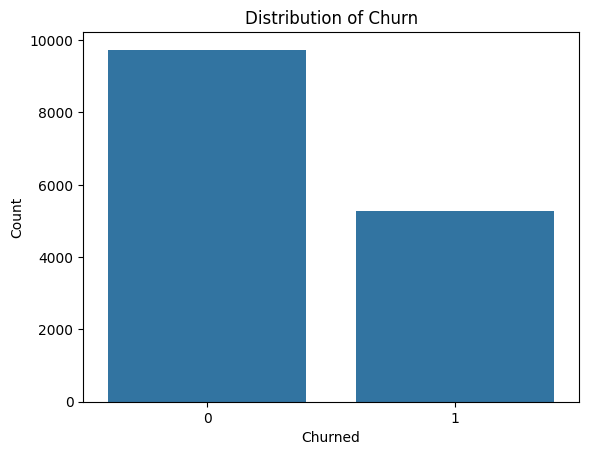

In [ ]:
# class distribution
churn_counts = df_ecom['churn'].value_counts()

# Visualize (use the counts object)
X = df_ecom.drop(columns=['churn'])
y = df_ecom['churn']

sns.barplot(x=churn_counts.index, y=churn_counts.values)
plt.xlabel('Churned')
plt.ylabel('Count')
plt.title("Distribution of Churn");

In [ ]:
# Show correlations with churn
correlations = df_ecom.corr(numeric_only=True)['churn']
correlations

account_age_months         -0.055466
avg_orders_per_month       -0.329303
avg_order_value            -0.227626
returns_rate                0.408676
support_tickets_6m          0.453958
reviews_submitted          -0.023658
website_visits_per_month   -0.070751
cart_abandonment_rate       0.047411
loyalty_member             -0.074769
payment_failures_12m        0.060467
device_type                -0.002159
discount_usage_rate         0.000945
days_since_last_active      0.128634
satisfaction_score         -0.444600
churn                       1.000000
Name: churn, dtype: float64

In [ ]:
# Seperate data into X and y 
X = df_ecom.drop(columns=['churn'])
y = df_ecom['churn']

# Split data using sklearn, follow the standard naming conventions (X_train, X_test etc...)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Baseline Random Forest Model

In [ ]:
# Instantiate model and fit the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get training score
rf_train_score = rf_model.score(X_train, y_train)

# Cross validation scores (don't average)
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')

In [ ]:
# Print out the training and cross-validation scores
print(f"Random Forest Training Score: {rf_train_score:.3f}")
print(f"Random Forest CV Score: {rf_cv_scores.mean():.3f}")

Random Forest Training Score: 1.000
Random Forest CV Score: 0.915


## Boosting Models

In [ ]:
# Instantiate and fit all models
# Adaboost model
ada_model = AdaBoostClassifier(random_state=42)
ada_model.fit(X_train, y_train)

# Gradient Boosting model
grad_model = GradientBoostingClassifier(random_state=42)
grad_model.fit(X_train, y_train)

# XBGboost model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Get training scores
ada_train_score = ada_model.score(X_train, y_train)
grad_train_score = grad_model.score(X_train, y_train)
xgb_train_score = xgb_model.score(X_train, y_train)

# Cross validate all models using accuracy
ada_cv_scores = cross_val_score(ada_model, X_train, y_train, cv=5, scoring='accuracy')
grad_cv_scores = cross_val_score(grad_model, X_train, y_train, cv=5, scoring='accuracy')
xgb_cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='accuracy')

In [ ]:
# Print out the training and cross-validation scores for all models
print(f"Training and Cross Validation Performance Comparison of Boosted Models")
print(f"Adaptive Boosting: Train - {ada_train_score:.3f}, CV - {ada_cv_scores.mean():.3f}")
print(f"Gradient Boosting: Train - {grad_train_score:.3f}, CV - {grad_cv_scores.mean():.3f}")
print(f"Extreme Gradient Boosting: Train - {xgb_train_score:.3f}, CV - {xgb_cv_scores.mean():.3f}")

Training and Cross Validation Performance Comparison of Boosted Models
Adaptive Boosting: Train - 0.920, CV - 0.916
Gradient Boosting: Train - 0.939, CV - 0.922
Extreme Gradient Boosting: Train - 0.999, CV - 0.922


## Hyperparameter Tuning

In [ ]:
from xgboost import XGBClassifier

# Assign the model object
gs_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Create Param Grid
param_grid = {
    'learning_rate': [0.05, 0.1],
    'n_estimators': [200, 300],
    'max_depth': [3, 5],
    'min_child_weight': [1, 5],
    'scale_pos_weight': [1, 3]
}

# Instantiate GridSearchCV object
grid_search = GridSearchCV(gs_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train, y_train)

/opt/anaconda3/envs/mac_m.c0c1/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:56:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/mac_m.c0c1/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:56:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/mac_m.c0c1/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:56:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/mac_m.c0c1/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:56:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [3, 5],
                         'min_child_weight': [1, 5], 'n_estimators': [200, 300],
                         'scale_pos_weight': [1, 3]},
             scoring='accuracy')

In [ ]:
# Print out the best model results
print("Best Model Results from Grid Search")
print(f"CV Score: {grid_search.best_score_:.3f}")
print(f"Best Hyperparameters: {grid_search.best_params_}")

Best Model Results from Grid Search
CV Score: 0.932
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 300, 'scale_pos_weight': 1}


## Final Model Analysis

In [ ]:
# Extract final model
final_model = grid_search.best_estimator_

# Final Model training accuracy
final_score_train = final_model.score(X_train, y_train)

# Final model testing accuracy
final_score_test = final_model.score(X_test, y_test)

# Produce classification report
y_pred_test = final_model.predict(X_test)
cr = classification_report(y_test, y_pred_test)

# Produce confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

Final Model Evaluation
Accuracy on the Training Data: 0.960
Accuracy on the Testing Data: 0.923
Classification Report
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1930
           1       0.90      0.89      0.89      1070

    accuracy                           0.92      3000
   macro avg       0.92      0.91      0.92      3000
weighted avg       0.92      0.92      0.92      3000

Confusion Matrix


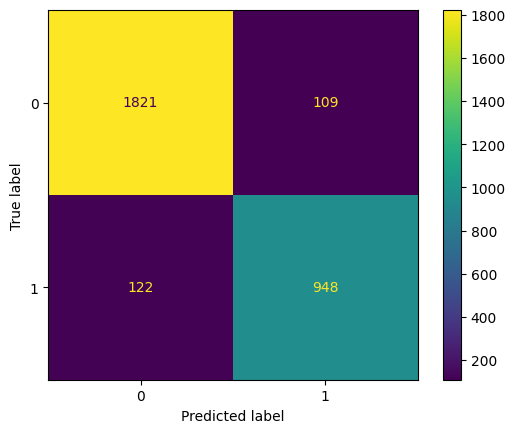

In [17]:
# Run this cell without changes to display results
print(f"Final Model Evaluation")
print(f"Accuracy on the Training Data: {final_score_train:.3f}")
print(f"Accuracy on the Testing Data: {final_score_test:.3f}")
print(f"Classification Report")
print(cr)
print(f"Confusion Matrix")
display = ConfusionMatrixDisplay(cm)
display.plot();

In [ ]:
# Assign name of metric
alternative_metric = "recall"

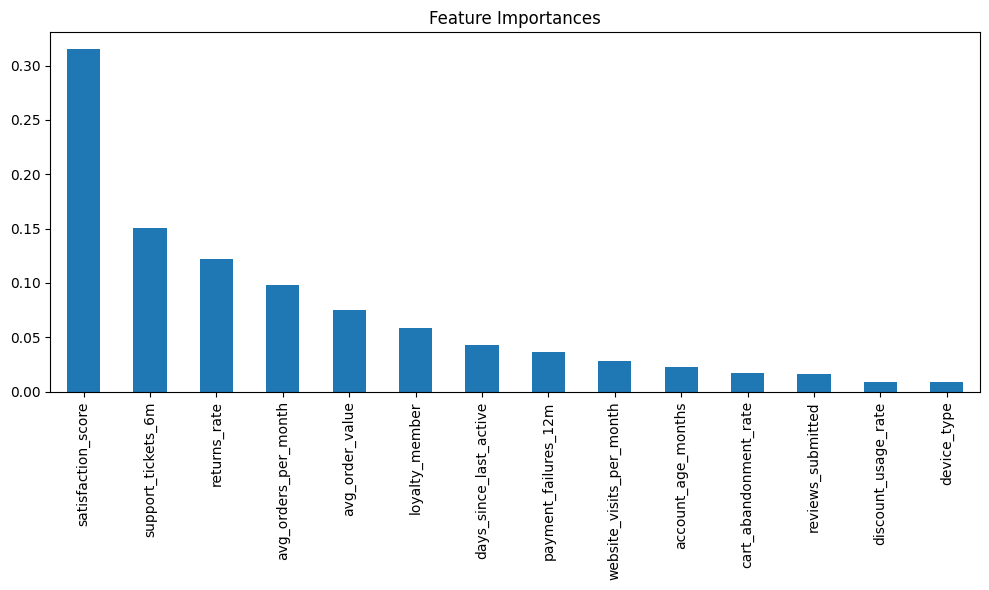

In [ ]:
# Extract feature importance from final model
feature_importance = final_model.feature_importances_

importances = pd.Series(feature_importance, index=X_train.columns)
importances = importances.sort_values(ascending=False)
    
plt.figure(figsize=(10, 6))
importances.plot(kind='bar')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()